In [12]:
import os, sys, inspect

cmd_folder = os.path.realpath(os.path.abspath(os.path.split(inspect.getfile( inspect.currentframe() ))[0]))
if cmd_folder not in sys.path:
    sys.path.insert(0, cmd_folder)


cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"lib/Leap")))
if cmd_subfolder not in sys.path:
    sys.path.insert(0, cmd_subfolder)
    cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"lib/Anderson")))
if cmd_subfolder not in sys.path:
    sys.path.insert(0, cmd_subfolder)

In [13]:
import pandas as pd
import numpy as np
import neuralnetworks as nn
import mlutils as ml

In [14]:
def trainNNs(X, T, trainFraction, hiddenLayerStructures, numberRepetitions, numberIterations, classify=False):
    import neuralnetworks as nn
    import mlutils as ml
    import numpy as np
    import time
    result = []
    for structure in hiddenLayerStructures:
        trainedResult = []
        testResult = []
        t0 = time.time()
        for n in range(0, numberRepetitions):
            Xtrain,Ttrain,Xtest,Ttest = ml.partition(X,T,(trainFraction, 1-trainFraction),classify)
            if classify:
                nnet = nn.NeuralNetworkClassifier(X.shape[1], structure, len(np.unique(T)))
                nnet.train(Xtrain, Ttrain, numberIterations, errorPrecision=1.e-8)
                trainedResult.append(np.sum(nnet.use(Xtrain)==Ttrain)/len(Ttrain))
                testResult.append(np.sum(nnet.use(Xtest)==Ttest)/len(Ttest))
            else:
                nnet = nn.NeuralNetwork(X.shape[1], structure, T.shape[1])
                nnet.train(Xtrain, Ttrain, numberIterations)
                trainedResult.append(np.sqrt(np.mean(((nnet.use(Xtrain)-Ttrain)**2))))
                testResult.append(np.sqrt(np.mean(((nnet.use(Xtest)-Ttest)**2))))

            
        result.append([structure, trainedResult, testResult, time.time() - t0])
    return result

def summarize(results):
    import numpy as np
    summaryResults = []
    for result in results:
        summaryResults.append([result[0], np.mean(result[1]), np.mean(result[2]), result[3]])
    return summaryResults


def bestNetwork(summary):
    best = min(summary, key=lambda l: l[2])
    return best


Dependencies/import config

## Get Data

In [31]:
data = pd.read_csv("templates/data1.csv")
names = list(data)
data["signcode"] = data["sign"].astype('category').cat.codes
data = data.values

In [32]:
Xhands = data[:, 0:63]
Xhands = Xhands.astype(np.float64)

In [33]:
Tsign = data[:, 64:65]
Tsign = Tsign.astype(np.int32)

In [34]:
Xhands.shape

(226, 63)

In [35]:
Tsign.shape

(226, 1)

In [36]:
handNames = names[0:63]
signName = names[63]

In [37]:
for i in range(0, len(np.unique(Tsign).tolist())):
    print('{} samples in class {}'.format(np.sum(Tsign==i), i))

11 samples in class 0
11 samples in class 1
14 samples in class 2
11 samples in class 3
10 samples in class 4
11 samples in class 5
9 samples in class 6
9 samples in class 7
11 samples in class 8
9 samples in class 9
7 samples in class 10
8 samples in class 11
10 samples in class 12
8 samples in class 13
9 samples in class 14
8 samples in class 15
6 samples in class 16
6 samples in class 17
7 samples in class 18
8 samples in class 19
8 samples in class 20
6 samples in class 21
9 samples in class 22
6 samples in class 23
7 samples in class 24
7 samples in class 25


Get list of how many samples in each class/category/how many of each sign.

## Test NNet

In [43]:
results = trainNNs(Xhands, Tsign, 0.90, [[50], [20, 20], [5,2,2,5], [5,5,5], [5,5], 5], 10, 100, classify=True)

In [44]:
results

[[[50],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.57692307692307687,
   0.23076923076923078,
   0.46153846153846156,
   0.61538461538461542,
   0.38461538461538464,
   0.65384615384615385,
   0.57692307692307687,
   0.5,
   0.5,
   0.69230769230769229],
  6.848530054092407],
 [[20, 20],
  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
  [0.42307692307692307,
   0.46153846153846156,
   0.61538461538461542,
   0.57692307692307687,
   0.30769230769230771,
   0.42307692307692307,
   0.46153846153846156,
   0.46153846153846156,
   0.42307692307692307,
   0.65384615384615385],
  5.210667610168457],
 [[5, 2, 2, 5],
  [0.27000000000000002,
   0.17000000000000001,
   0.16,
   0.125,
   0.20000000000000001,
   0.23499999999999999,
   0.13,
   0.22,
   0.19,
   0.16],
  [0.23076923076923078,
   0.11538461538461539,
   0.076923076923076927,
   0.0,
   0.15384615384615385,
   0.15384615384615385,
   0.076923076923076927,
   0.19230769230769232,
   0.11538461538461539,
   0.076

In [45]:
summarize(results)

[[[50], 1.0, 0.51923076923076927, 6.848530054092407],
 [[20, 20], 1.0, 0.48076923076923084, 5.210667610168457],
 [[5, 2, 2, 5], 0.186, 0.11923076923076922, 2.8853700160980225],
 [[5, 5, 5], 0.372, 0.21538461538461537, 3.8704960346221924],
 [[5, 5], 0.61299999999999999, 0.29615384615384616, 2.6453473567962646],
 [5, 0.76500000000000001, 0.41923076923076924, 2.358802318572998]]

In [46]:
bestNet = bestNetwork(summarize(results))
bestNet

[[5, 2, 2, 5], 0.186, 0.11923076923076922, 2.8853700160980225]

## Plot the test

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

#run best on 
Xtrain,Ttrain,Xtest,Ttest = ml.partition(Xhands,Tsign,(0.8, 0.2),True)
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], bestNet[0], len(np.unique(Ttrain)))
nnet.train(Xtrain, Ttrain, 100)

NeuralNetwork(63, [5, 2, 2, 5], 26)
   Network was trained for 100 iterations. Final error is 0.08607090617278289.

In [48]:
result = nnet.use(Xtest)

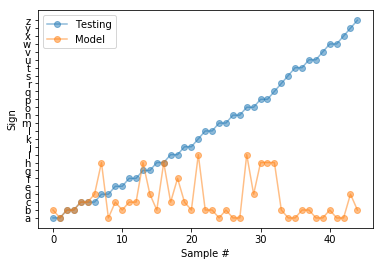

In [49]:
#plt.subplot(3, 1, 1)
plt.plot(Ttest, 'o-', alpha=0.5)
plt.plot(result, "o-", alpha=0.5)

labels = np.unique(data[:, 63])
plt.xlabel("Sample #")
plt.ylabel("Sign")

plt.yticks(np.unique(Ttest).tolist(), np.unique(labels).tolist())

plt.legend(('Testing','Model'), loc='upper left')

In [29]:
np.unique(Ttest).tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

vs

In [30]:
np.unique(Tsign).tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25]

Numerical versions of the sign categories actually in the test data (may not include all of the categories in the dataset, since it's randomly sampled)